In [1]:
!nvidia-smi

Fri Jan 20 14:05:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display

import ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.6/258.6 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.1 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=955ede6791ce85a5

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8l-seg.pt conf=0.5 source='shutterstock.jpg'

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
YOLOv8l-seg summary: 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs
image 1/1 /content/shutterstock.jpg: 640x640 12 persons, 1 traffic light, 2 backpacks, 1 umbrella, 5 handbags, 66.8ms
Speed: 0.6ms pre-process, 66.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


/content


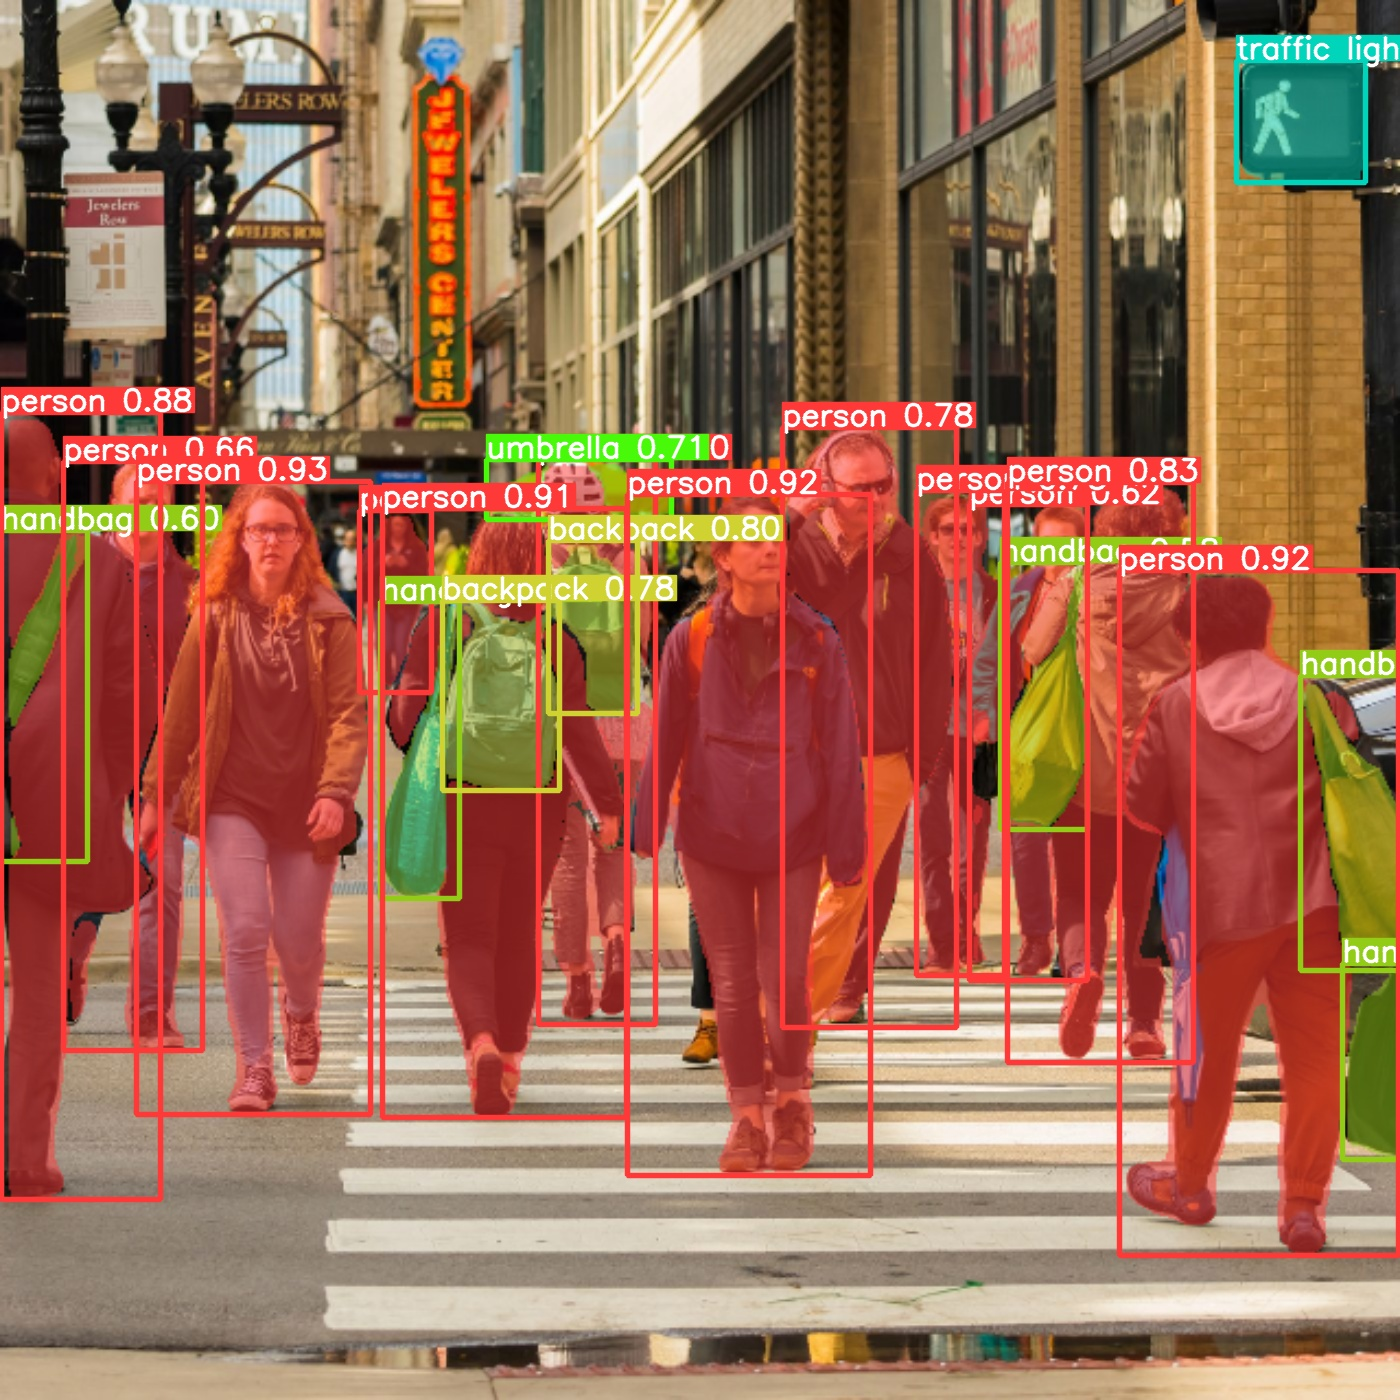

In [8]:
%cd {HOME}
Image(filename='/content/runs/segment/predict2/shutterstock.jpg', height=600)

In [ ]:
#results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
#results[0].boxes.conf

tensor([0.72656, 0.28857, 0.28296], device='cuda:0')

In [ ]:
#results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Hm8mdFJnlkZnoorR3Uy8")
project = rf.workspace("tennis-ai").project("football-boxes")
dataset = project.version(1).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 19.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b3437d2d636866692bada9a3ff7d29719ca621893a4b39b2c5feeb9da23e65f6
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.14
    Uninstalling urllib3-1.26.14:
      Successfully uninstalled urllib3-1.26.14
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyp

Extracting Dataset Version Zip to football-boxes-1 in yolov8:: 100%|██████████| 1334/1334 [00:00<00:00, 2066.47it/s]


## Custom Training

In [10]:
pwd


'/content'

In [17]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/football-boxes-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, n

In [18]:
!ls {HOME}/runs/segment/train6/

args.yaml					    results.png
BoxF1_curve.png					    train_batch0.jpg
BoxP_curve.png					    train_batch1.jpg
BoxPR_curve.png					    train_batch2.jpg
BoxR_curve.png					    train_batch540.jpg
confusion_matrix.png				    train_batch541.jpg
events.out.tfevents.1674159667.d7257d0c067c.9477.0  train_batch542.jpg
MaskF1_curve.png				    val_batch0_labels.jpg
MaskP_curve.png					    val_batch0_pred.jpg
MaskPR_curve.png				    val_batch1_labels.jpg
MaskR_curve.png					    val_batch1_pred.jpg
predictions.json				    weights
results.csv


/content


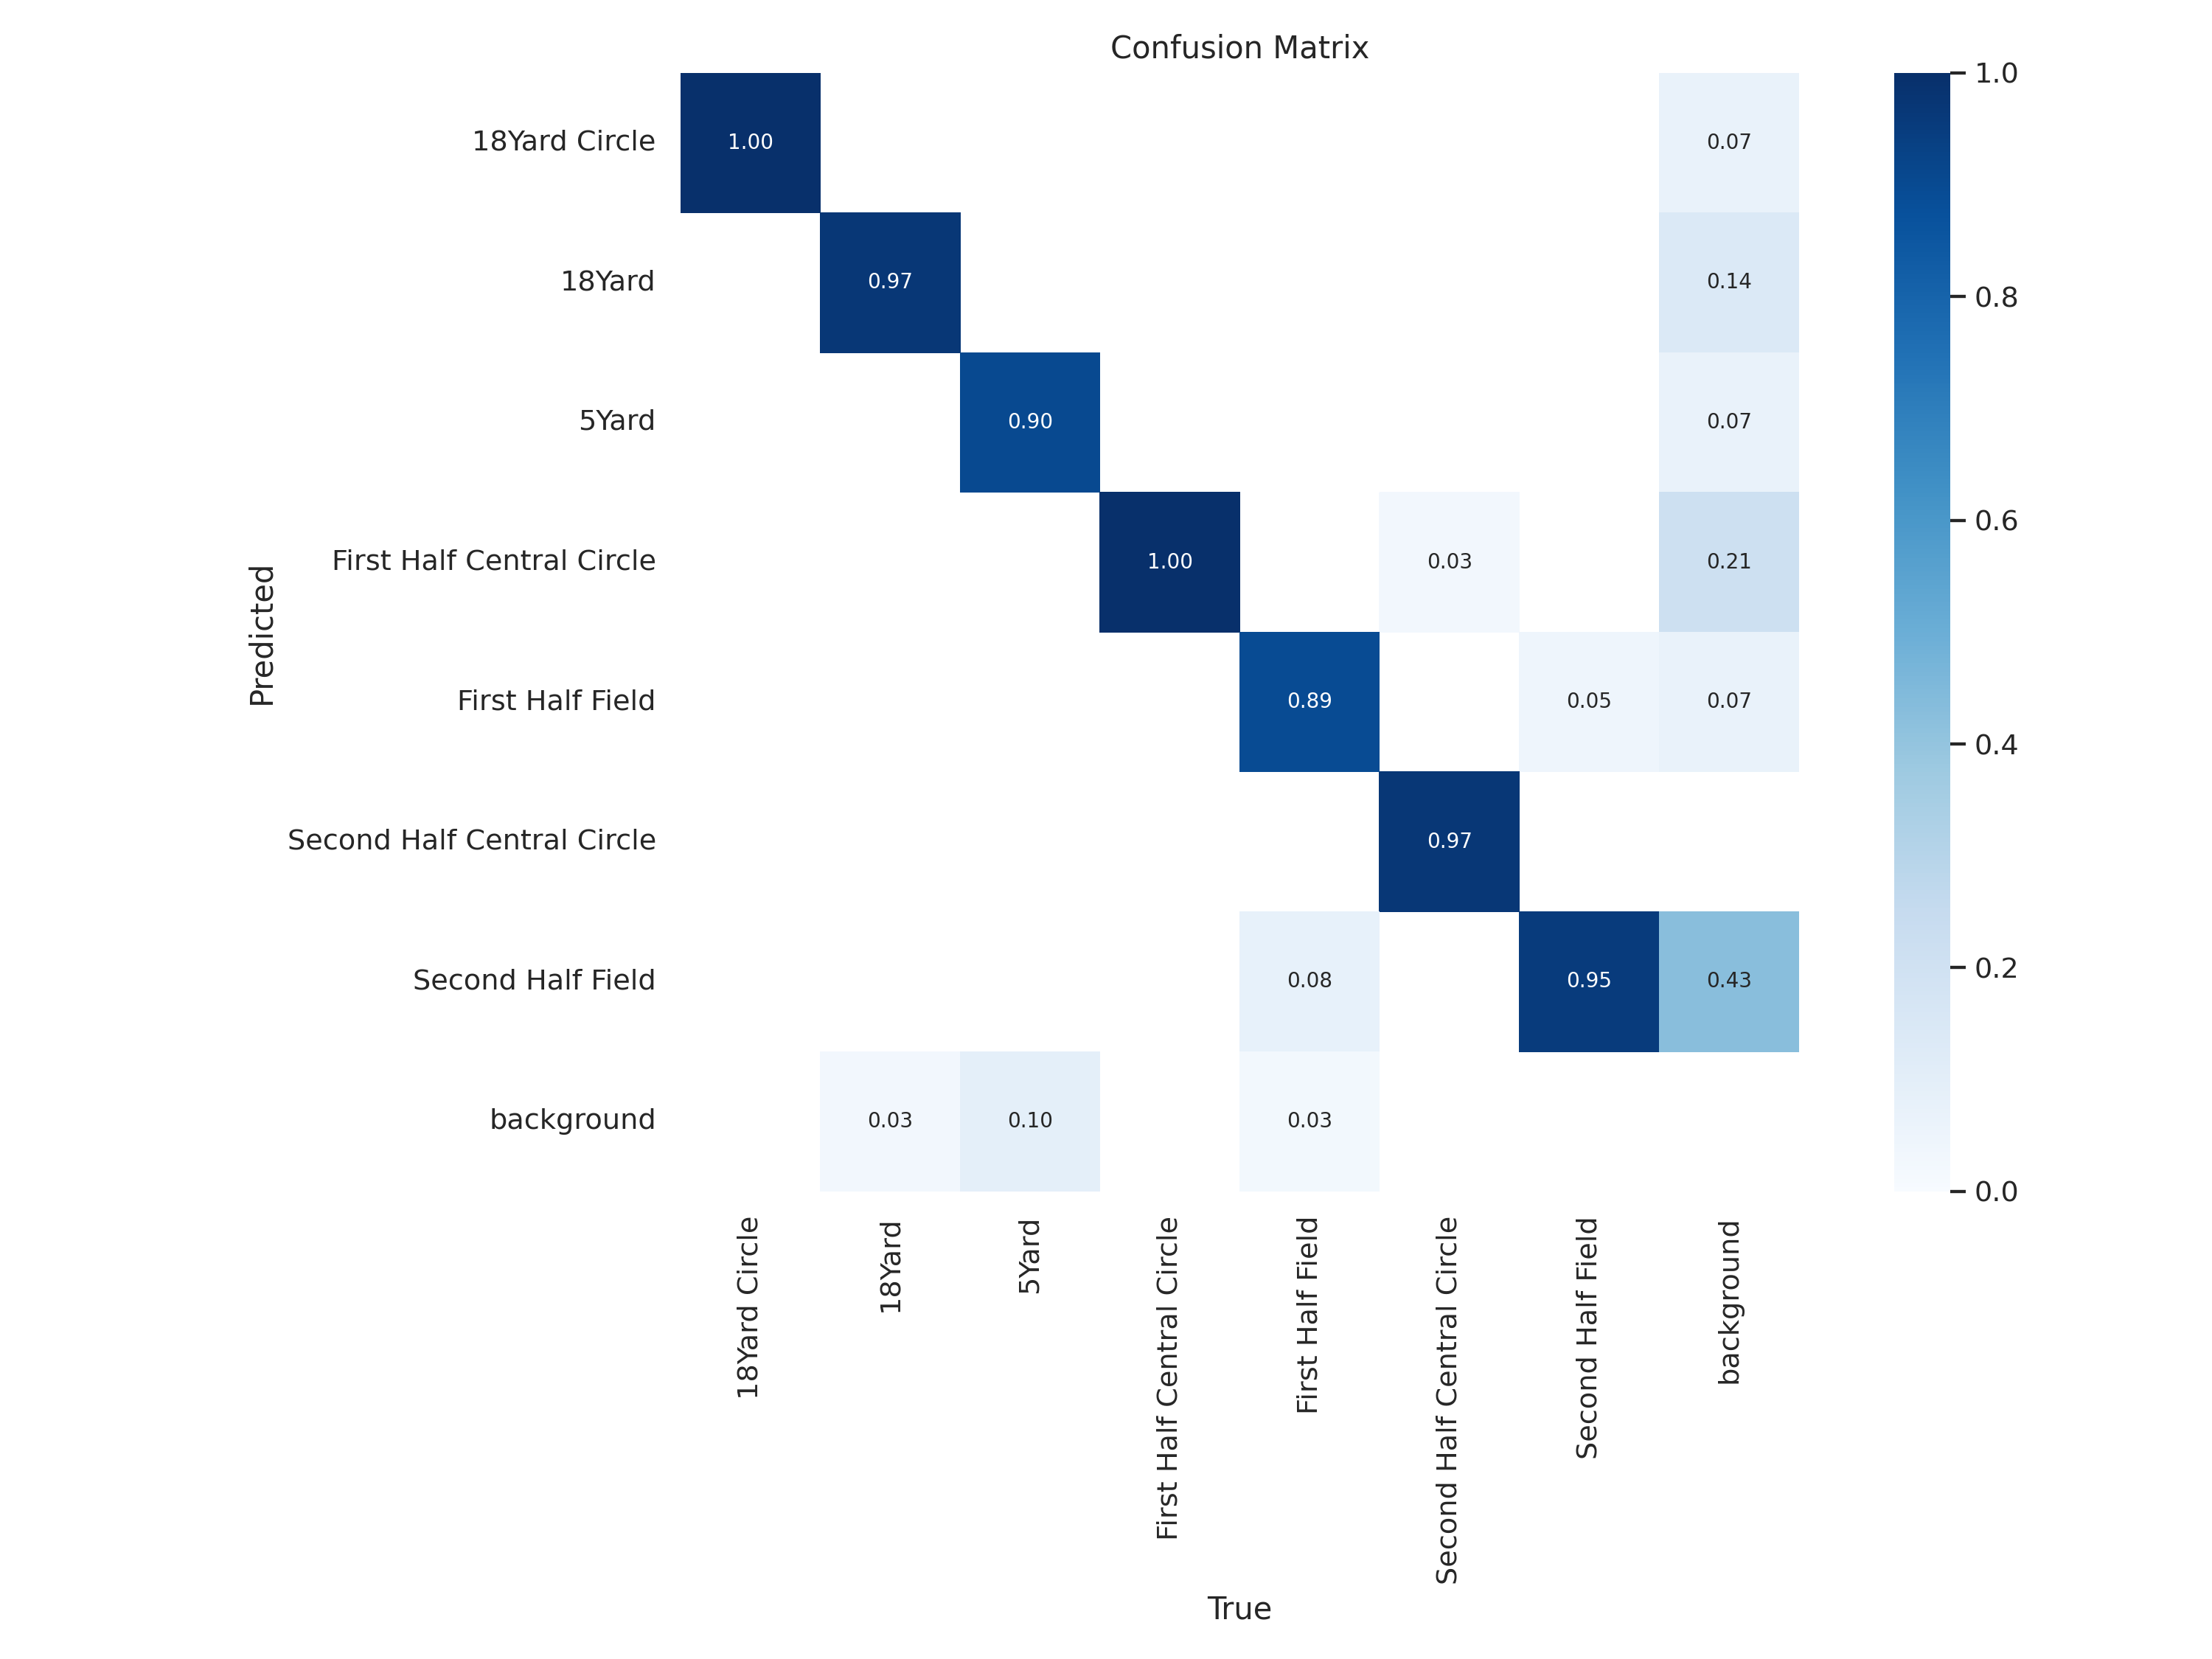

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train6/confusion_matrix.png', width=600)

/content


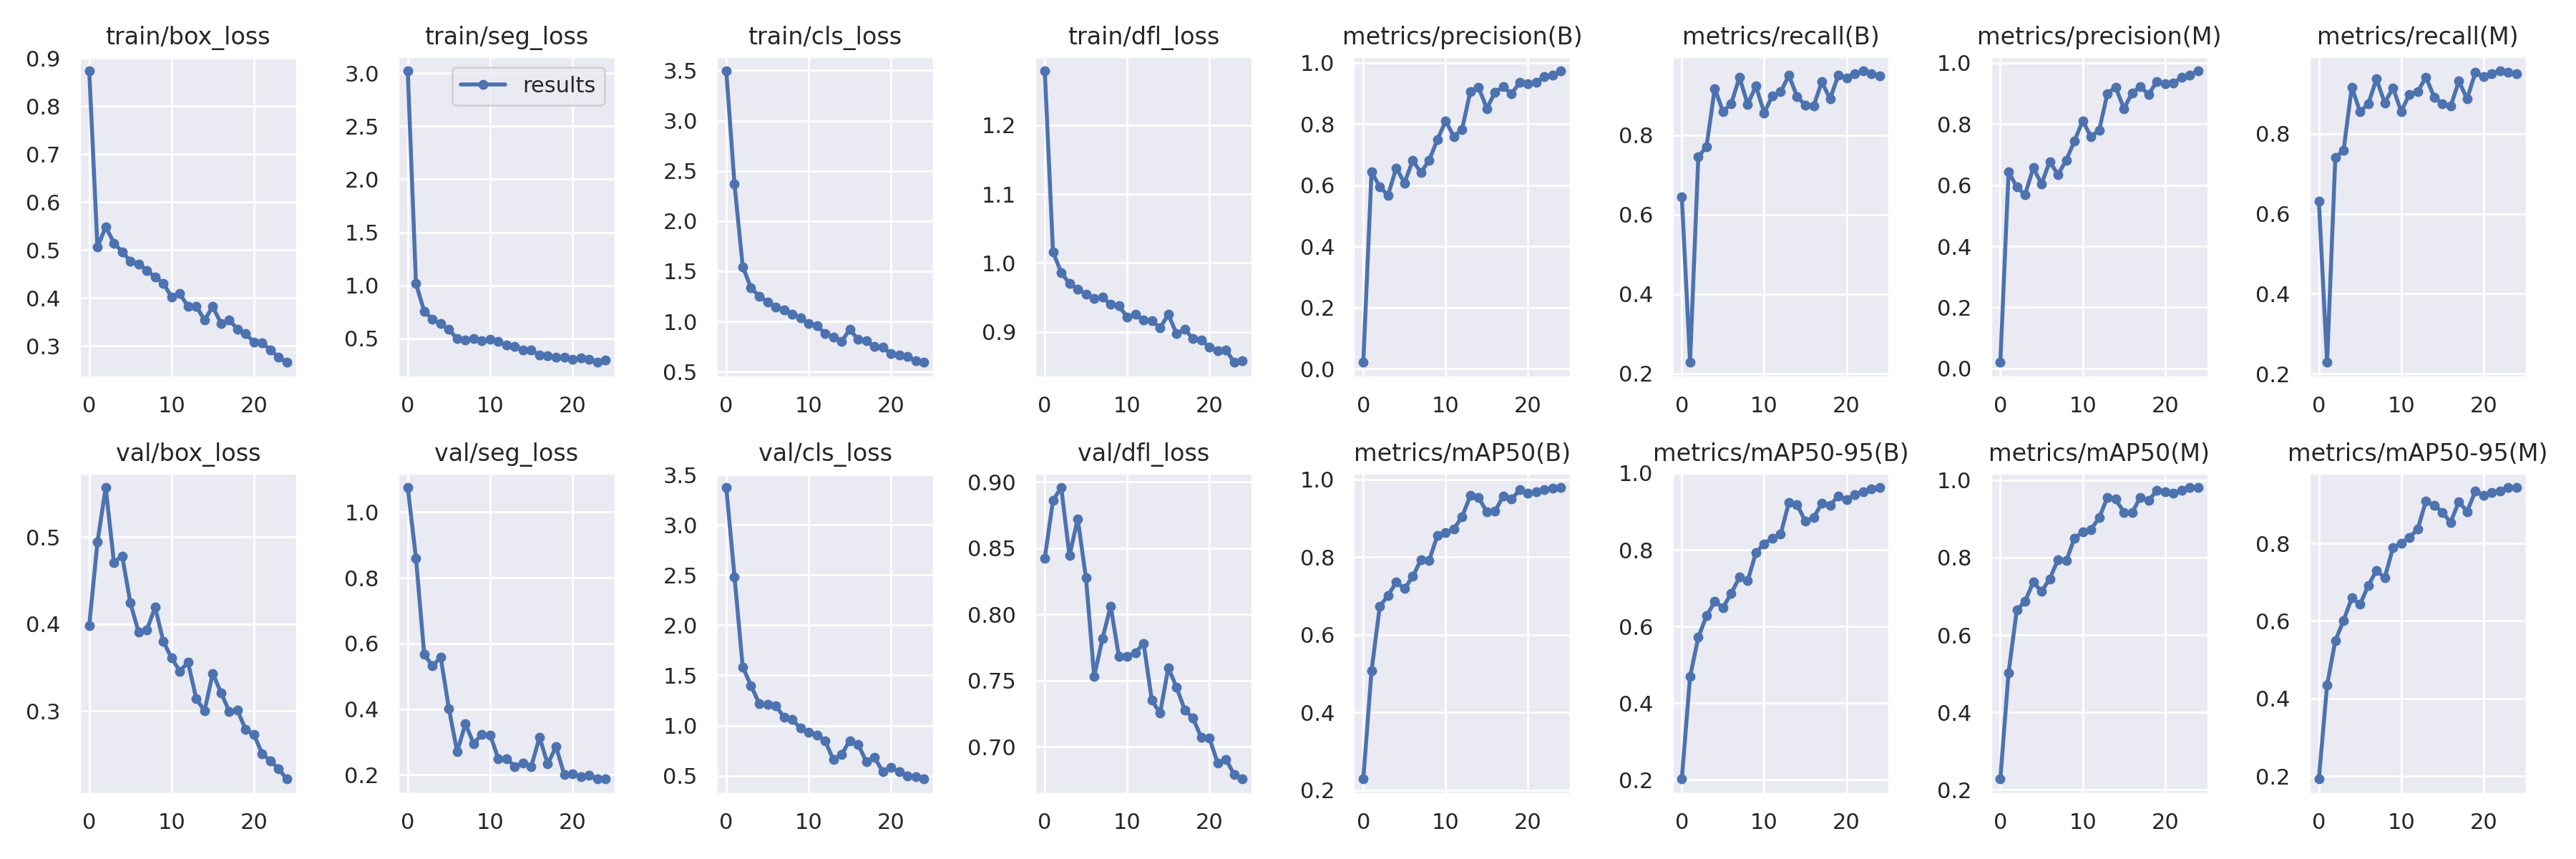

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train6/results.png', width=600)

## Validate Custom Model

In [22]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
YOLOv8n-seg summary: 195 layers, 3259429 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/football-boxes-1/valid/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100% 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.10s/it]
                   all         54        235      0.974      0.949      0.979      0.961      0.974      0.949       0.98      0.942
         18Yard Circle         54         31      0.961          1      0.994      0.961      0.961          1      0.994      0.924
                18Yard         54         36       0.94      0.972      0.983      0.953       0.94      0.972      0.983      0.939
                 5Yard         54         21          1      0.901      0.931      0.887          1      0.901      0.937

## Inference with Custom Model

In [23]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
YOLOv8n-seg summary: 195 layers, 3259429 parameters, 0 gradients, 12.0 GFLOPs
image 1/31 /content/football-boxes-1/test/images/ArsTot_mp4-18_jpg.rf.55e360bbbec9190a2504726f91cec0f8.jpg: 640x640 1 18Yard Circle, 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 10.1ms
image 2/31 /content/football-boxes-1/test/images/ArsTot_mp4-21_jpg.rf.403a2af1eecf8d524888ee791b87d3c8.jpg: 640x640 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 13.4ms
image 3/31 /content/football-boxes-1/test/images/ArsTot_mp4-25_jpg.rf.cd8c474be94344acef17a71a33e37963.jpg: 640x640 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 10.7ms
image 4/31 /content/football-boxes-1/test/images/ArsTot_mp4-8_jpg.rf.9db7e5390ad83907d8a9068606d418a6.jpg: 640x640 1 18

**NOTE:** Let's take a look at few results.

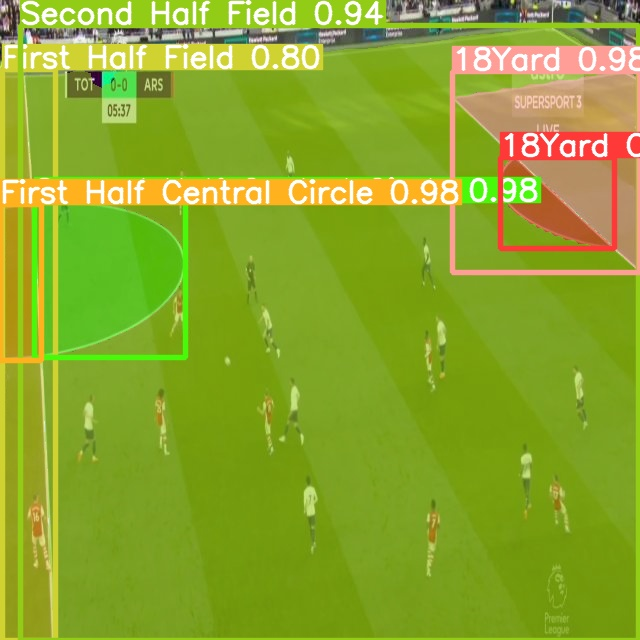

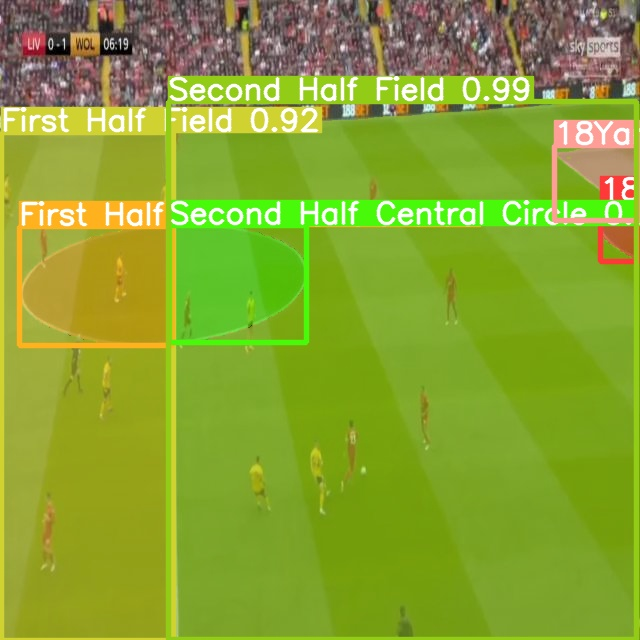

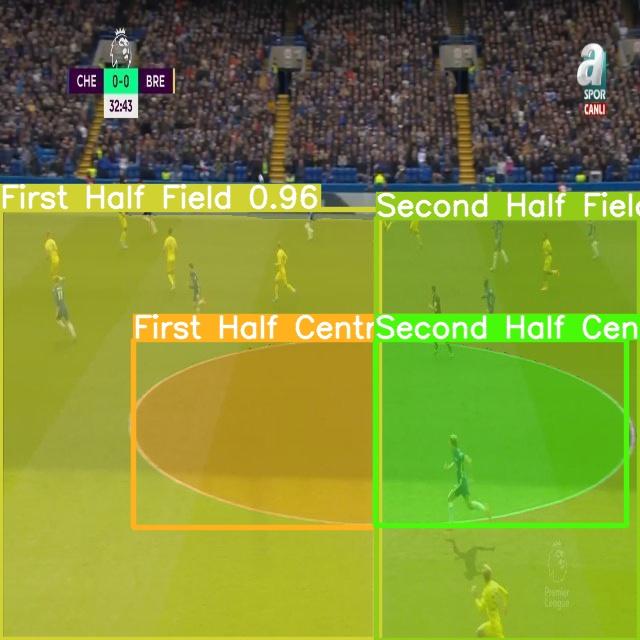

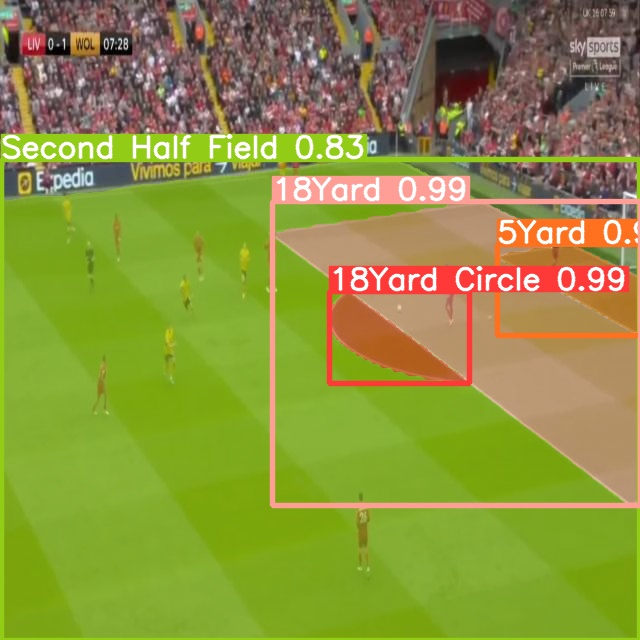

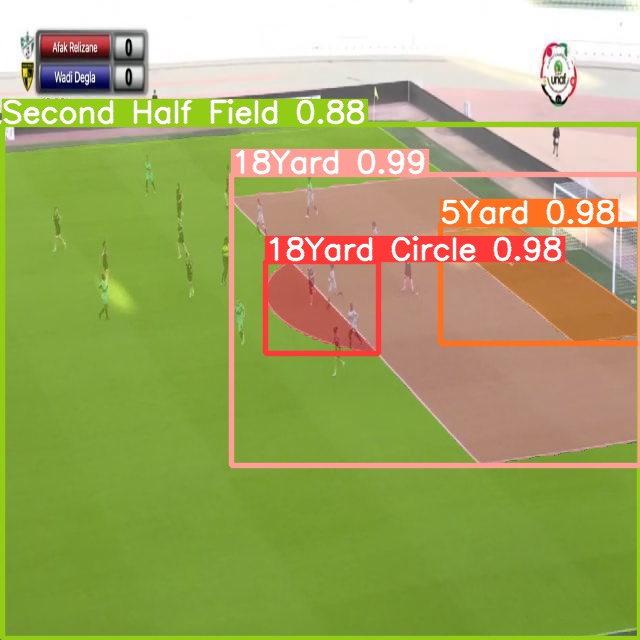

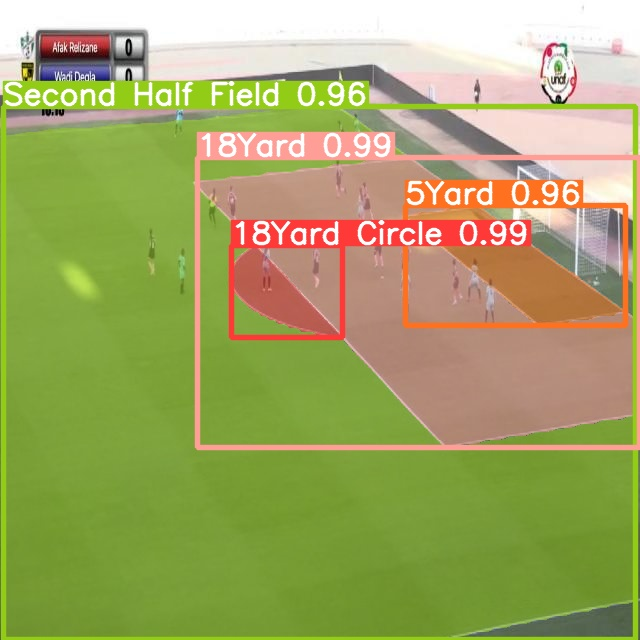

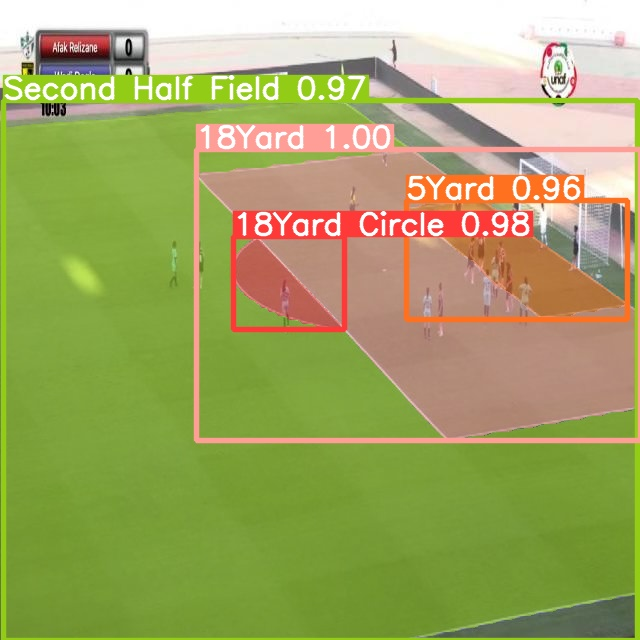

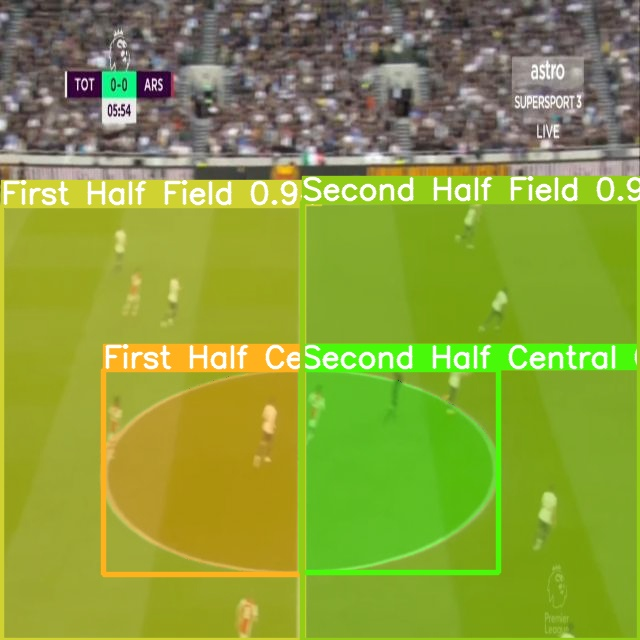

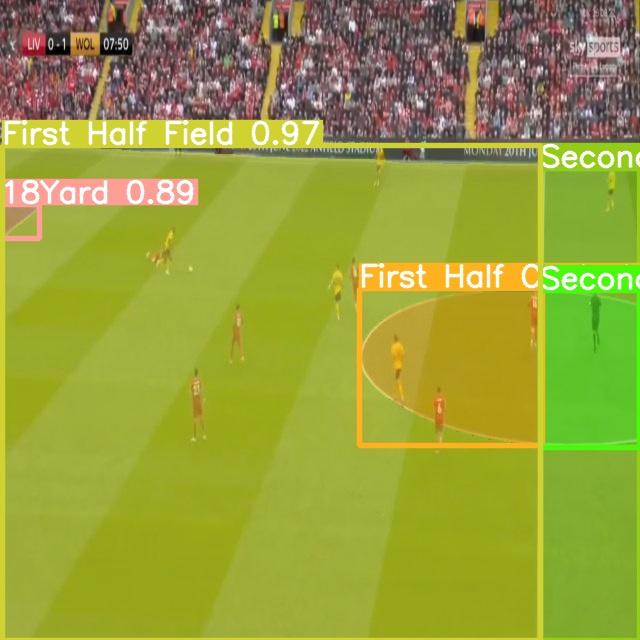

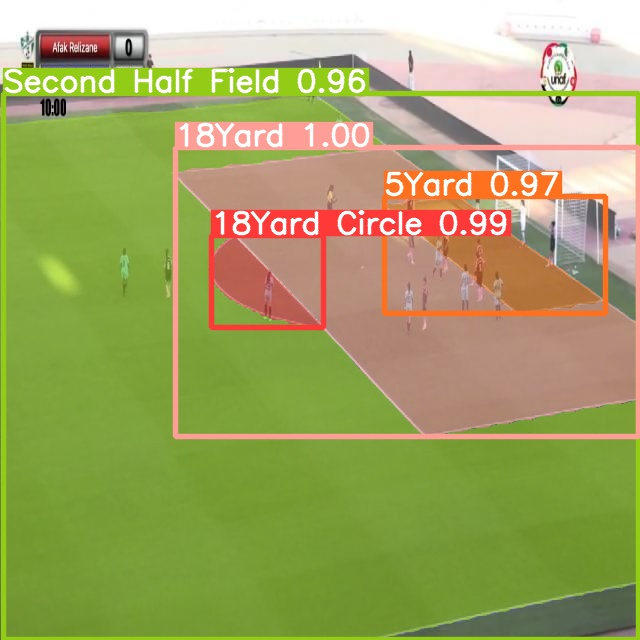

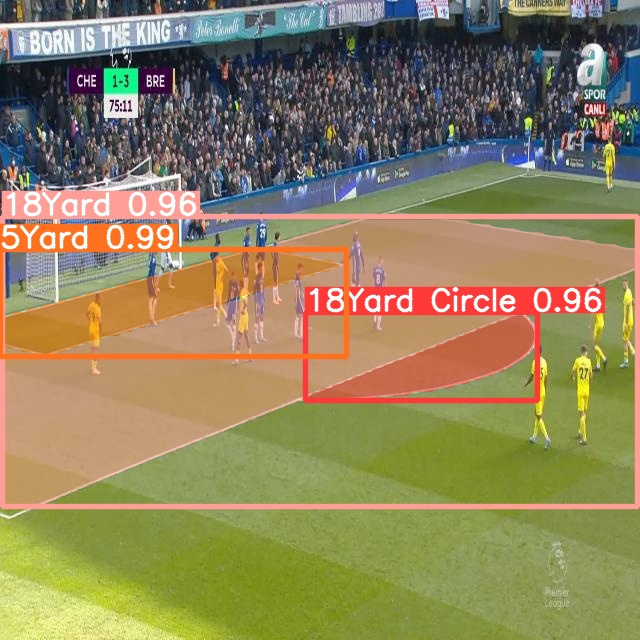

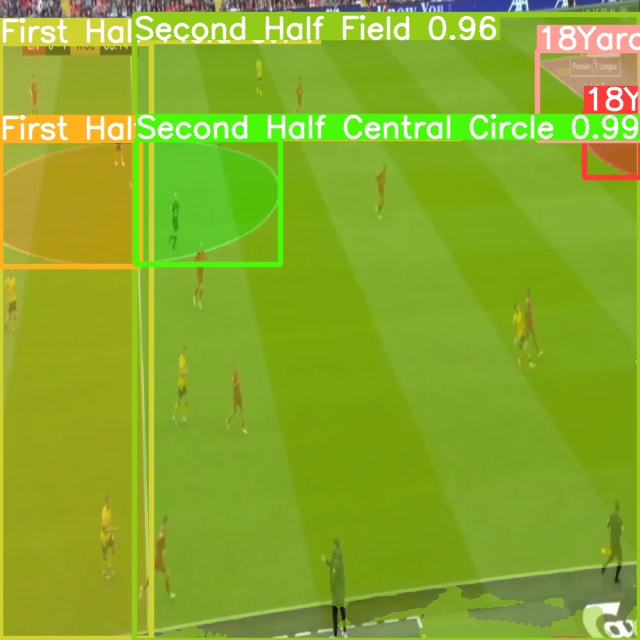

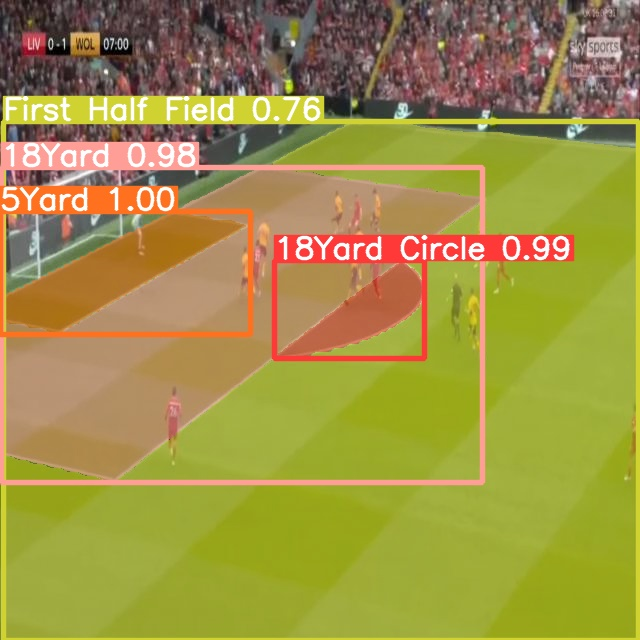

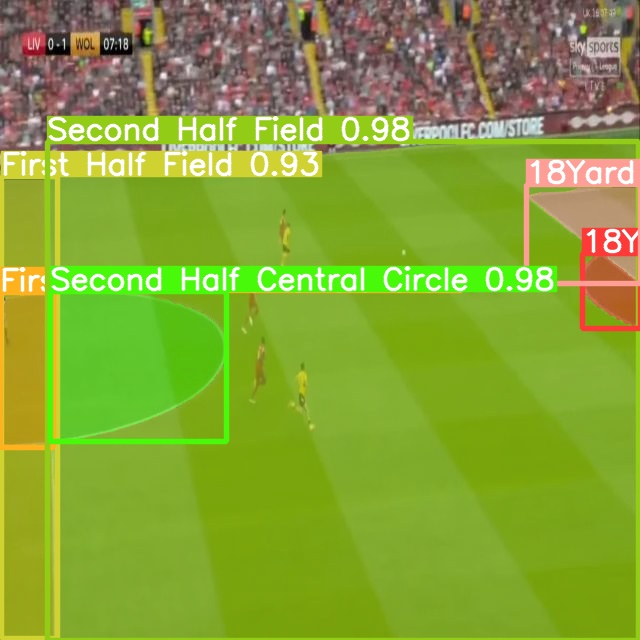

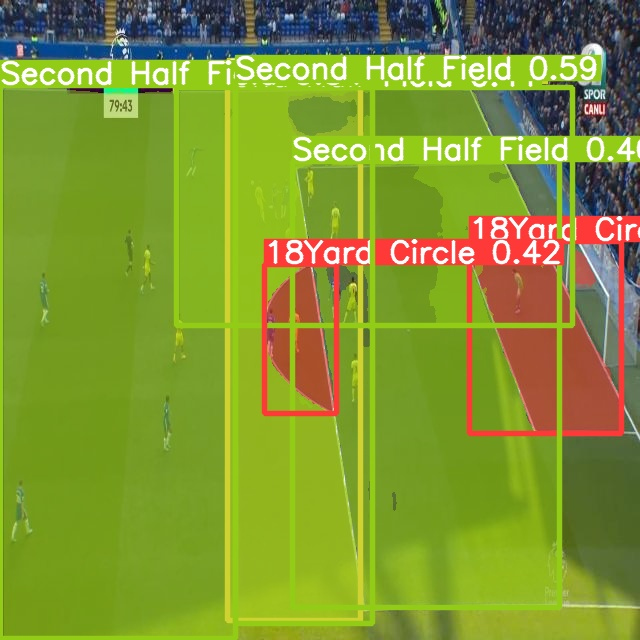

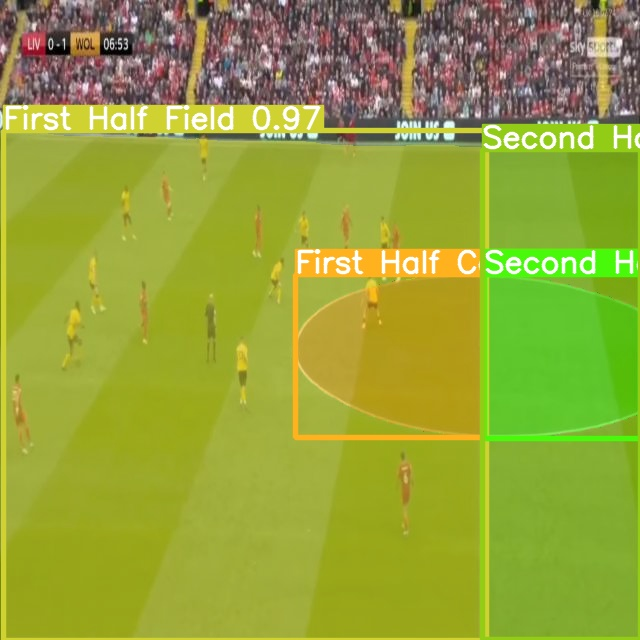

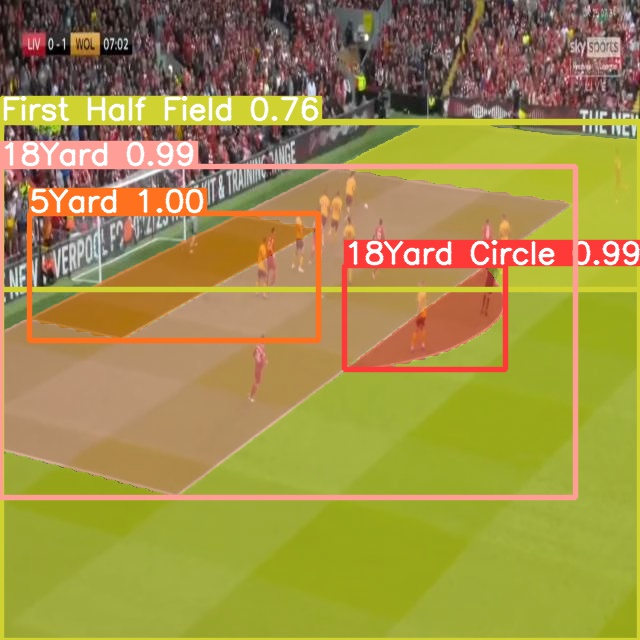

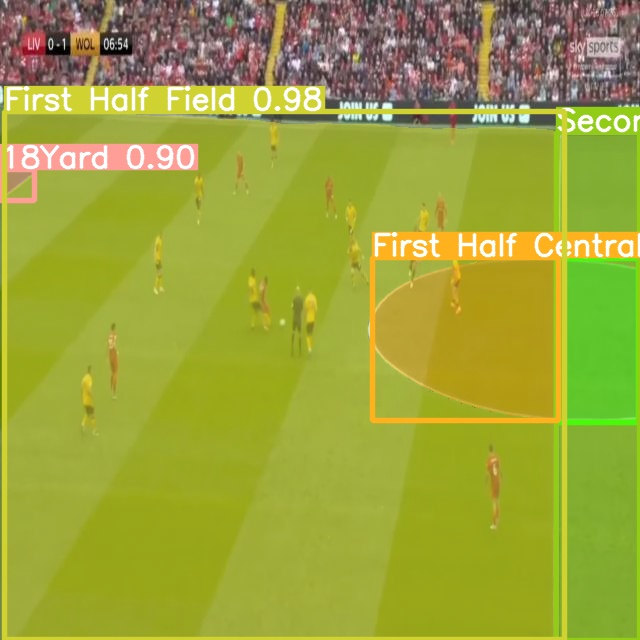

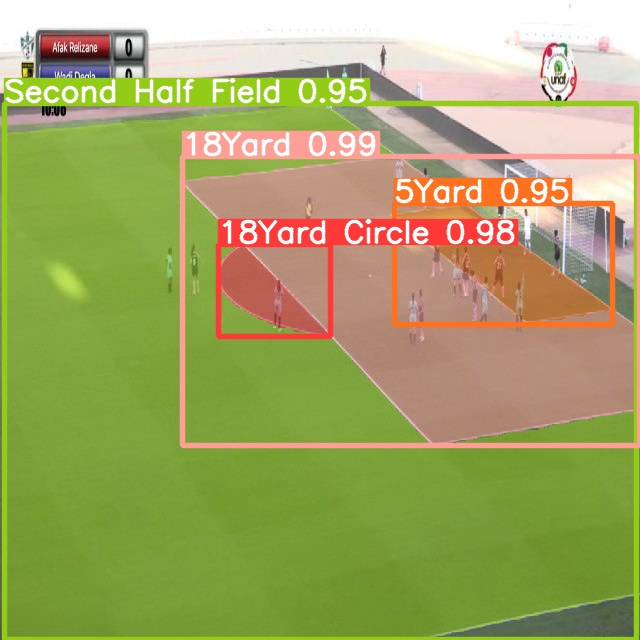

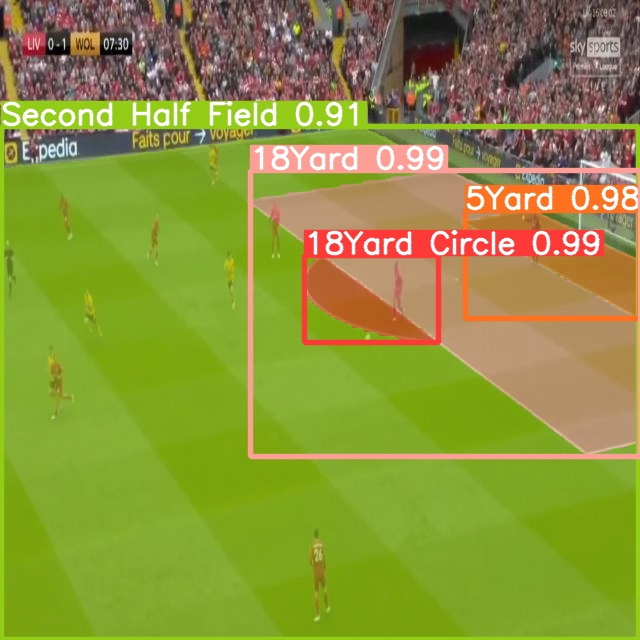

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
